# BRIEF 5 - Cleaning

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
df_clients = pd.read_csv(r'Ressources\RAW\clients.csv', 
                         dtype={'client_id':'string', 'sex':'string', 'birth':'int64'})
df_produits = pd.read_csv(r'Ressources\RAW\produits.csv', 
                          dtype={'id_prod':'string', 'price':'float64', 'categ':'int64'})
df_ventes = pd.read_csv(r'Ressources\RAW\ventes.csv', 
                          dtype={'id_prod':'string', 'date':'string', 'session_id':'string', 'client_id':'string'})
print(df_clients.sample(5),'\n')
print(df_produits.sample(5),'\n')
print(df_ventes.sample(5),'\n')

     client_id sex  birth
3177    c_1632   m   2004
535     c_1077   f   1985
1522    c_1881   f   1965
3783     c_270   m   1953
4965    c_3727   m   1985 

     id_prod  price  categ
658     0_18  25.49      0
2605   1_305  29.99      1
1352   0_694  11.35      0
2264    2_41  68.99      2
2880   0_611  12.99      0 

       id_prod                        date session_id client_id
315495  0_1420  2021-11-09 13:10:38.792489   s_117067    c_1598
65472   0_1156  2021-04-25 04:17:26.516086    s_25381    c_1368
327243  0_1227  2021-10-03 05:31:07.270768    s_99257    c_1744
92372   0_1218  2022-02-28 05:36:32.850402   s_172039    c_7946
59364   0_2241  2022-02-03 12:55:49.842925   s_159363    c_3461 



### Vérification des doublons

In [3]:
print('doublon clef clients : ',
      [df_clients['client_id'].duplicated()]==True)
print('doublon clef produits : ',
      [df_produits['id_prod'].duplicated()]==True)

doublon clef clients :  False
doublon clef produits :  False


### Merging

In [4]:
df_merge = df_ventes.merge(df_clients, how='left')
df_merge = df_merge.merge(df_produits, how='left')
df_merge

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


### Nettoyage

Je repère les NaN et les drops.

In [5]:
df_NaN = df_merge[df_merge.isnull().any(1)]
df_NaN

,id_prod,date,session_id,client_id,sex,birth,price,categ
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,NaN,NaN
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,NaN,NaN
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,NaN,NaN
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,NaN,NaN
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,NaN,NaN
...,...,...,...,...,...,...,...,...
322710,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,NaN,NaN
329417,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,NaN,NaN
330490,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,NaN,NaN
335531,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,NaN,NaN


In [6]:
df_NaN.to_csv(r'Ressources\error_produits.csv')
df_merge = df_merge.drop(df_NaN.index)

In [7]:
print(df_merge.describe(), '\n')
print('======================================================= \n')
print(df_merge.info())

               birth          price          categ
count  336913.000000  336913.000000  336913.000000
mean     1977.837326      17.204376       0.429900
std        13.532198      17.855658       0.590999
min      1929.000000      -1.000000       0.000000
25%      1971.000000       8.580000       0.000000
50%      1980.000000      13.900000       0.000000
75%      1987.000000      18.990000       1.000000
max      2004.000000     300.000000       2.000000 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 336913 entries, 0 to 337015
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336913 non-null  string 
 1   date        336913 non-null  string 
 2   session_id  336913 non-null  string 
 3   client_id   336913 non-null  string 
 4   sex         336913 non-null  string 
 5   birth       336913 non-null  int64  
 6   price       336913 non-null  float64
 7   categ       336913 non-null  float64
dtypes: 

Je m'interesse aux outliers sur les nombres de commandes passé.

In [8]:
nb_com = df_merge.pivot_table(columns=['client_id'], aggfunc='size')
nb_com.describe()

count     8602.000000
mean        39.166822
std        156.418669
min          1.000000
25%         14.000000
50%         25.000000
75%         47.000000
max      12855.000000
dtype: float64

[Text(0.5, 1.0, 'Nombre de ventes par clients')]

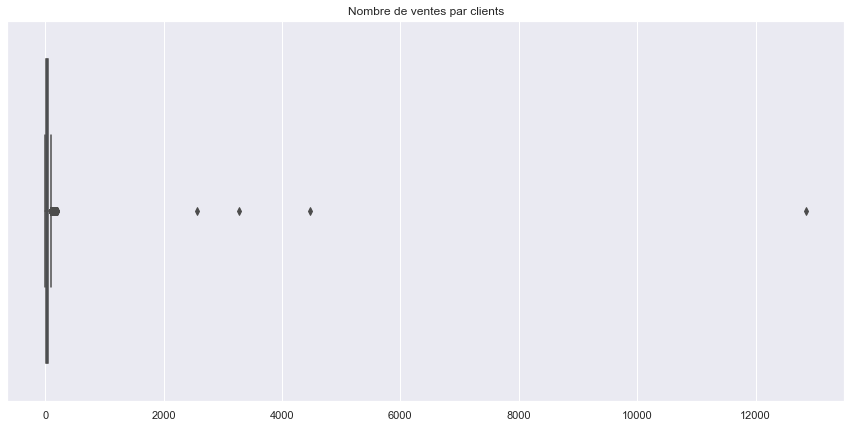

In [9]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(x=nb_com).set(title='Nombre de ventes par clients')

Il y a 4 valeurs qui sortent du lot.. Je les isoles et les drop. Ce doit être des commandes professionelles.

In [10]:
print(nb_com[nb_com>2000])

client_id
c_1609    12855
c_3454     3273
c_4958     2562
c_6714     4471
dtype: int64


In [11]:
drop = df_merge[(df_merge['client_id'] == 'c_1609') 
                | (df_merge['client_id']=='c_3454') 
                | (df_merge['client_id']=='c_4958')
                | (df_merge['client_id']=='c_6714')].index
df_merge.drop(index=drop, inplace=True)

[Text(0.5, 1.0, 'Nombre de ventes par client')]

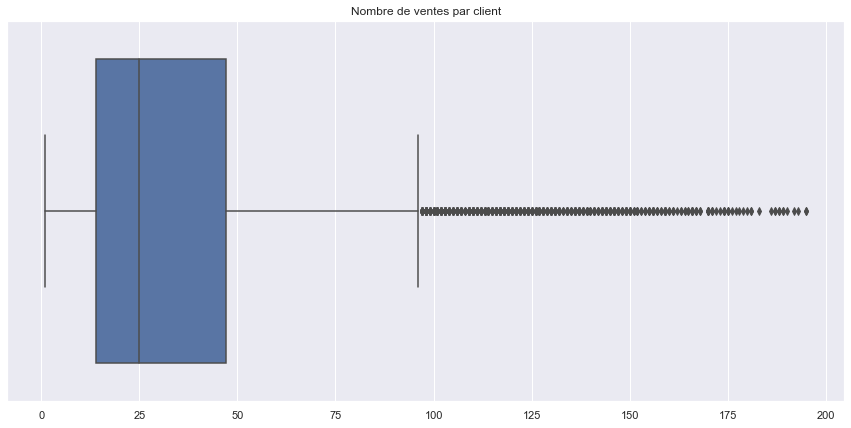

In [12]:
nb_com2 = df_merge.pivot_table(columns=['client_id'], aggfunc='size')
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(x=nb_com2).set(title='Nombre de ventes par client')

#### Price :

In [13]:
df_merge['price'].describe()

count    313752.000000
mean         17.091438
std          17.597168
min          -1.000000
25%           8.580000
50%          13.790000
75%          18.990000
max         300.000000
Name: price, dtype: float64

On peut remarquer un problème avec les prix dont la valeur minimale est -1.

In [14]:
df_merge[df_merge['price']<=0]

,id_prod,date,session_id,client_id,sex,birth,price,categ
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,2001,-1.0,0.0
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,m,2001,-1.0,0.0
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,m,2001,-1.0,0.0
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,f,2001,-1.0,0.0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,m,2001,-1.0,0.0
...,...,...,...,...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0,f,2001,-1.0,0.0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1,m,2001,-1.0,0.0
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1,m,2001,-1.0,0.0
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1,m,2001,-1.0,0.0


Il y a 200 commandes à -1, qui repressante seulement 1 produit (T_0) commandé par 2 clients (ct_0 et ct_1) qui sont des clients test.

In [15]:
drop = df_merge[(df_merge['id_prod'] == 'T_0') 
                | (df_merge['client_id']=='ct_0') 
                | (df_merge['client_id']=='ct_1')].index
df_merge.drop(index=drop, inplace=True)
df_merge['date'] = pd.to_datetime(df_merge['date'])

Je vérifie la limite haute s'il n'y a pas d'incohérence.

In [16]:
df_merge[df_merge['price']>250]

,id_prod,date,session_id,client_id,sex,birth,price,categ
25701,2_76,2021-11-20 02:53:26.747301,s_122253,c_2221,m,1997,254.44,2.0
50236,2_2,2021-03-07 14:07:31.004391,s_3041,c_1001,m,1982,300.00,2.0
81845,2_2,2021-06-12 08:44:00.882917,s_47558,c_5237,m,1999,300.00,2.0
209202,2_76,2021-06-25 16:42:42.846215,s_53679,c_7578,m,1995,254.44,2.0
229704,2_76,2021-12-13 16:41:52.579788,s_133825,c_665,f,2004,254.44,2.0
252824,2_76,2021-08-12 14:52:15.909705,s_74790,c_2791,m,2004,254.44,2.0
281271,2_2,2021-05-02 18:34:47.753888,s_28956,c_2329,f,1996,300.00,2.0
303397,2_2,2021-06-06 23:14:33.815188,s_45088,c_2467,f,1997,300.00,2.0
334950,2_2,2022-02-28 21:24:28.442508,s_172373,c_659,f,2001,300.00,2.0


#### Birth :

Je vérifie que les années soit cohérentes (pas de 1700 ni de date supérieur à la date actuelle).

In [17]:
df_merge['birth'].describe()

count    313552.000000
mean       1977.793489
std          13.797582
min        1929.000000
25%        1971.000000
50%        1979.000000
75%        1987.000000
max        2004.000000
Name: birth, dtype: float64

### Export

In [18]:
df_merge.to_csv(r'Ressources\CURATED\data.csv', index_label=False)